### Graph 4 conditional Graph


In [23]:
from typing import TypedDict
from langgraph.graph import END,START,StateGraph

In [24]:
class AgentState(TypedDict):
    number_1:int
    operation:str
    number_2:int
    final_number:int

In [25]:
def add_func(state:AgentState)->AgentState:
    """"""

    state["final_number"] = state["number_1"]+state["number_2"]
    return state

def minus_func(state:AgentState)->AgentState:
    """"""

    state["final_number"] = state["number_1"]-state["number_2"]
    return state

def router_func(state:AgentState)->AgentState:
    """"""
    
    if state["operation"]=="+":
        return "add_edge"
    elif state["operation"]=="-":
        return "minus_edge"

In [26]:
graph = StateGraph(AgentState)
graph.add_node("add_node",add_func)
graph.add_node("minus_node",minus_func)
# 不能直接router_func，node需要输入输出都是state
# graph.add_node("router",router_func)
graph.add_node("router",lambda state:state)

graph.add_edge(START,"router")

graph.add_conditional_edges(
    # 源点
    "router",
    # 转移函数
    router_func,

    {
        # 添加条件转移边 Edge:Node
        "add_edge":"add_node",
        "minus_edge":"minus_node"
    }
    
)

# langgraph特性，如果有node执行结束后没有指向新的node，就自动指向end
# 所以下面两行代码写不写效果都是一样的
graph.add_edge("add_node",END)
graph.add_edge("minus_node",END)

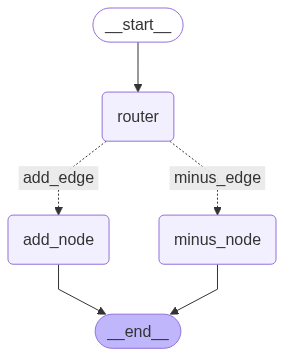

In [27]:
app = graph.compile()
app

In [33]:
test_state = AgentState(
    number_1=10,
    operation="+",
    number_2=9
)
result = app.invoke(test_state)
# invoke不会改变test_state的原有状态，只是会生成一个复印件
# test_state["final_number"]
result["final_number"]

19

In [54]:
class HW_State(TypedDict):
    num_1:int
    operation_1:str
    num_2:int
    res_1:int

    num_3:int
    num_4:int
    operation_2:str
    res_2:int

In [55]:
def hw_rout_1(state:HW_State):
    """"""
    if state["operation_1"]=="+":
        return "hw_add_operation_1"
    elif state["operation_1"]=="-":
        return "hw_minus_operation_1"

def hw_add_func_1(state:HW_State):
    """"""
    state["res_1"] = state["num_1"]+state["num_2"]
    return state

def hw_minus_func_1(state:HW_State):
    """"""
    state["res_1"] = state["num_1"]-state["num_2"]
    return state

def hw_rout_2(state:HW_State):
    """"""
    if state["operation_2"]=="+":
        return "hw_add_operation_2"
    elif state["operation_2"]=="-":
        return "hw_minus_operation_2"
    
def hw_add_func_2(state:HW_State):
    """"""
    state["res_2"] = state["num_3"]+state["num_4"]
    return state

def hw_minus_func_2(state:HW_State):
    """"""
    state["res_2"] = state["num_3"]-state["num_4"]
    return state


In [68]:
# 初始化图最好放在后面设计图一起，不然会重复构建图报错
hw_graph = StateGraph(HW_State)

hw_graph.add_node("hw_router_1",lambda state:state)

hw_graph.add_node("hw_addnode_1",hw_add_func_1)
hw_graph.add_node("hw_minusnode_1",hw_minus_func_1)

hw_graph.add_node("hw_router_2",lambda state:state)

hw_graph.add_node("hw_addnode_2",hw_add_func_2)
hw_graph.add_node("hw_minusnode_2",hw_minus_func_2)

In [69]:
hw_graph.add_edge(START,"hw_router_1")

hw_graph.add_edge("hw_addnode_1","hw_router_2")
hw_graph.add_edge("hw_minusnode_1","hw_router_2")

hw_graph.add_conditional_edges(
    "hw_router_1",
    hw_rout_1,
    {
        "hw_add_operation_1":"hw_addnode_1",
        "hw_minus_operation_1":"hw_minusnode_1"
    }
)

hw_graph.add_conditional_edges(
    "hw_router_2",
    hw_rout_2,
    {
        "hw_add_operation_2":"hw_addnode_2",
        "hw_minus_operation_2":"hw_minusnode_2"
    }
)

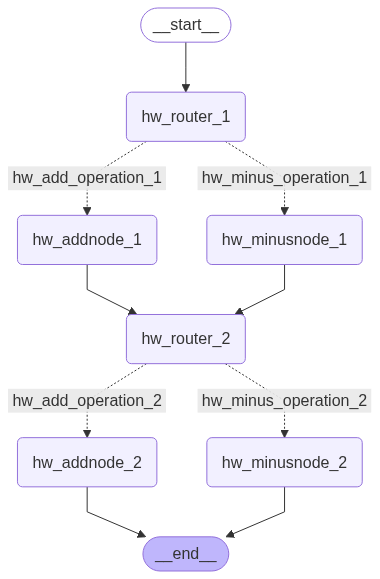

In [70]:
hw_app = hw_graph.compile()
hw_app

In [72]:
hw_test_state = HW_State(
    num_1=10,
    num_2=20,
    num_3=30,
    num_4=40,
    operation_1="+",
    operation_2="-"
)
hw_test = hw_app.invoke(hw_test_state)

In [73]:
hw_test

{'num_1': 10,
 'operation_1': '+',
 'num_2': 20,
 'res_1': 30,
 'num_3': 30,
 'num_4': 40,
 'operation_2': '-',
 'res_2': -10}

In [75]:
hw_test["res_1"]

30

In [76]:
hw_test["res_2"]

-10